# ======================================================================
# SEABORN VISUALIZATION MEGA SCRIPT
# Uses built-in datasets: tips, penguins, iris, flights
# ======================================================================

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



sns.set_theme()  # nice default theme

# --------------------------------------------------
# Load built-in datasets
# --------------------------------------------------

In [7]:
tips = sns.load_dataset("tips") # load built-in datasets
penguins = sns.load_dataset("penguins") # load built-in datasets
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")

print("tips head:\n", tips.head())
print("\npenguins head:\n", penguins.head())
print("\niris head:\n", iris.head())
print("\nflights head:\n", flights.head())

tips head:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

penguins head:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

iris head:
    sepal_length  sepal_width  petal_len

# ======================================================================
# PART 1: APPLIED VISUALIZATION WITH SEABORN (tips dataset)
# ======================================================================

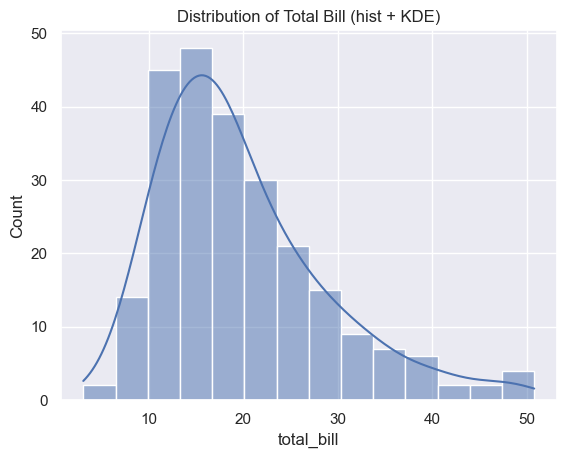

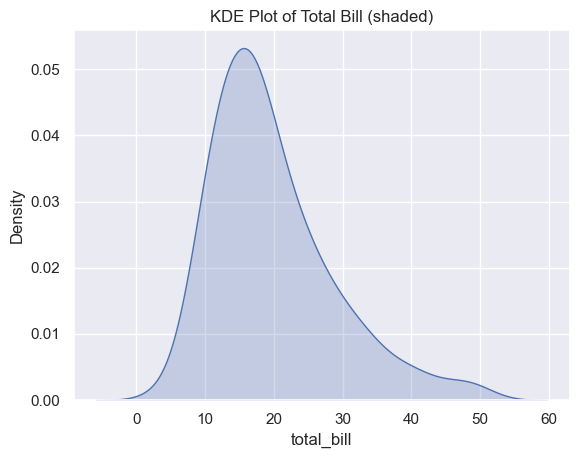

In [8]:
# --------------------------------------------------
# 1.1 Distribution plots (histogram + KDE)
# --------------------------------------------------
plt.figure()
sns.histplot(data=tips, x="total_bill", kde=True)
plt.title("Distribution of Total Bill (hist + KDE)")
plt.show()

plt.figure()
sns.kdeplot(data=tips, x="total_bill", fill=True)
plt.title("KDE Plot of Total Bill (shaded)")
plt.show()


# --------------------------------------------------
# 1.2 Rug plot with KDE shading
# --------------------------------------------------

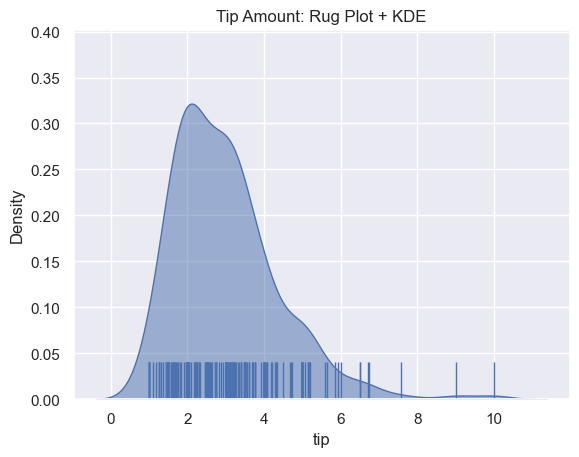

In [9]:
plt.figure()
sns.kdeplot(data=tips, x="tip", fill=True, alpha=0.5)
sns.rugplot(data=tips, x="tip", height=0.1)
plt.title("Tip Amount: Rug Plot + KDE")
plt.show()

# --------------------------------------------------
# 1.3 Regression plots in Seaborn (regplot)
# --------------------------------------------------

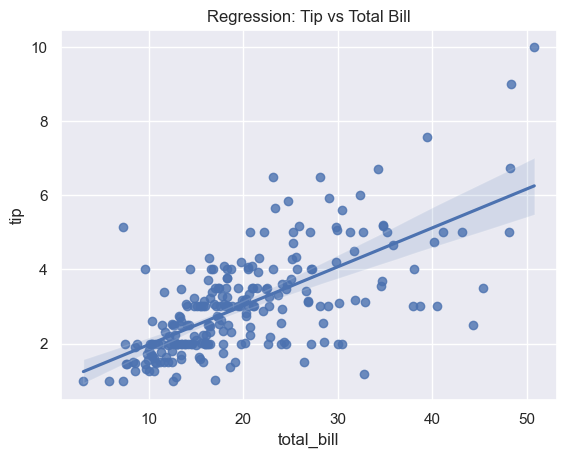

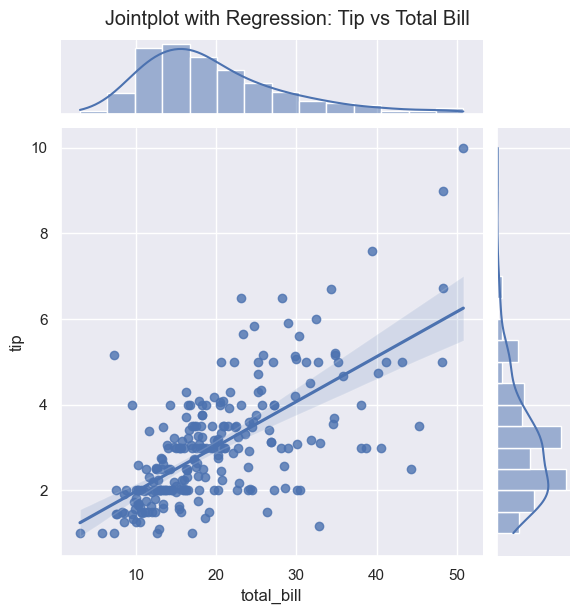

In [10]:
plt.figure()
sns.regplot(data=tips, x="total_bill", y="tip")
plt.title("Regression: Tip vs Total Bill")
plt.show()

# jointplot with regression
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")
plt.suptitle("Jointplot with Regression: Tip vs Total Bill", y=1.02)
plt.show()

# 1.4 Plotting multiple variables (pairplot, jointplot)

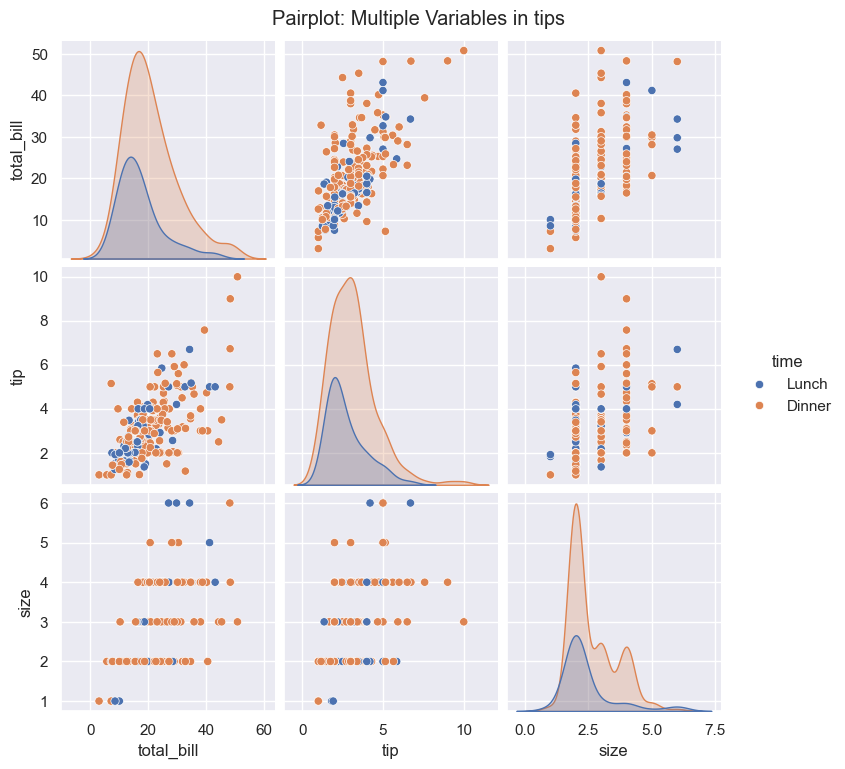

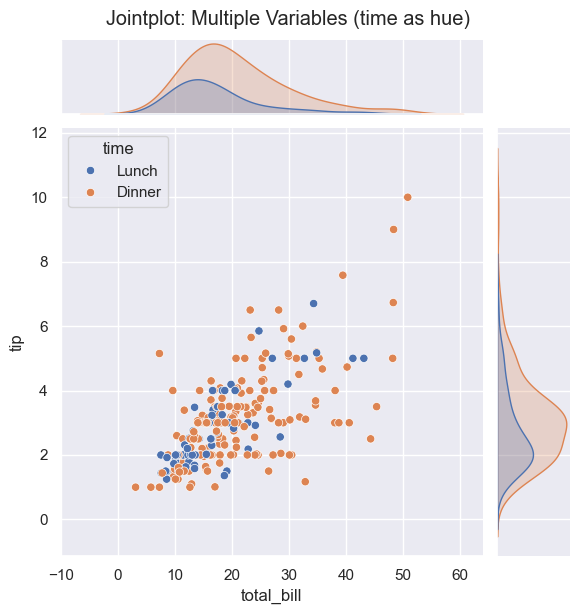

In [11]:
sns.pairplot(data=tips, vars=["total_bill", "tip", "size"], hue="time")
plt.suptitle("Pairplot: Multiple Variables in tips", y=1.02)
plt.show()

sns.jointplot(data=tips, x="total_bill", y="tip", hue="time")
plt.suptitle("Jointplot: Multiple Variables (time as hue)", y=1.02)
plt.show()

# 1.5 Multiple regression (lmplot with hue & col)

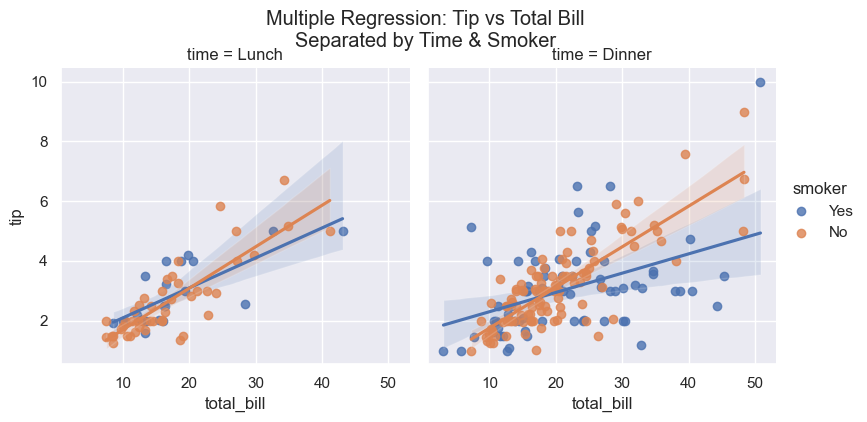

In [12]:
sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",
    col="time",
    height=4,
    aspect=1
)
plt.suptitle("Multiple Regression: Tip vs Total Bill\nSeparated by Time & Smoker", y=1.05)
plt.show()

# ======================================================================
# PART 2: CUSTOMIZING SEABORN PLOTS
# - Setting styles
# - Comparing styles
# - Matplotlib color codes
# - Color palettes
# - Multiple plots / FacetGrid
# ======================================================================


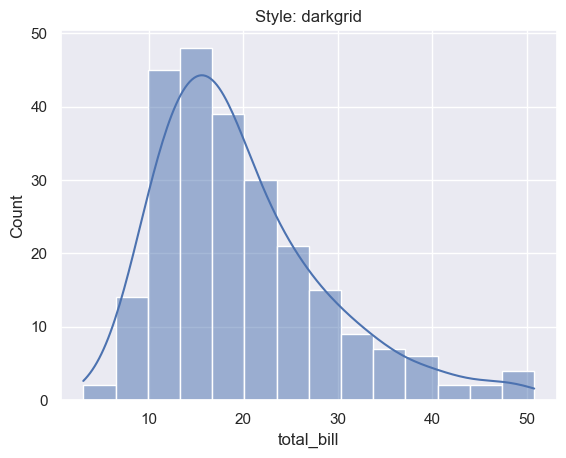

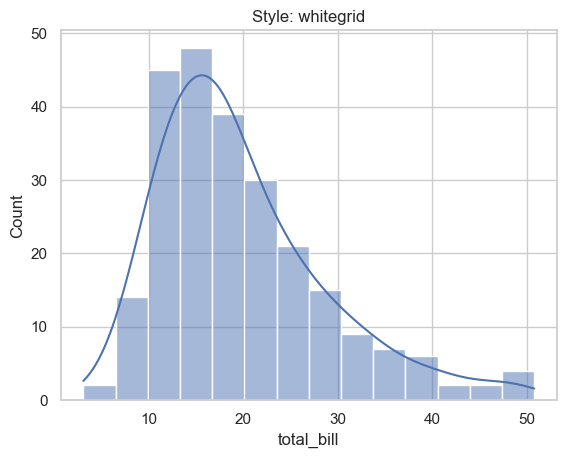

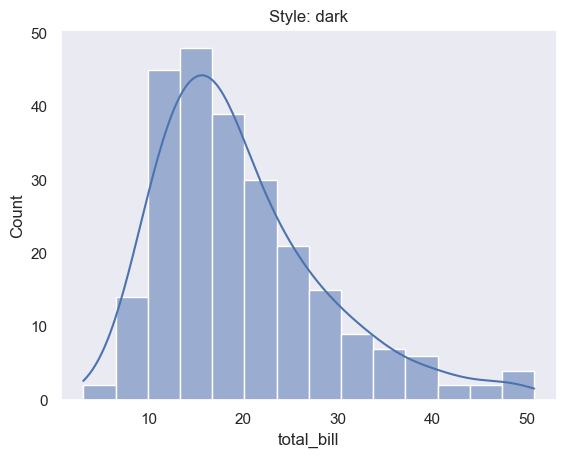

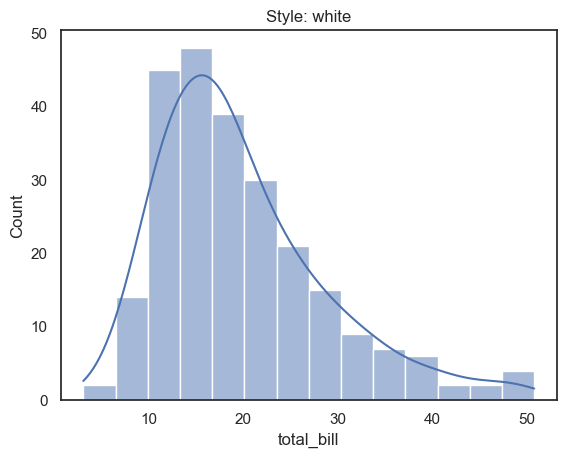

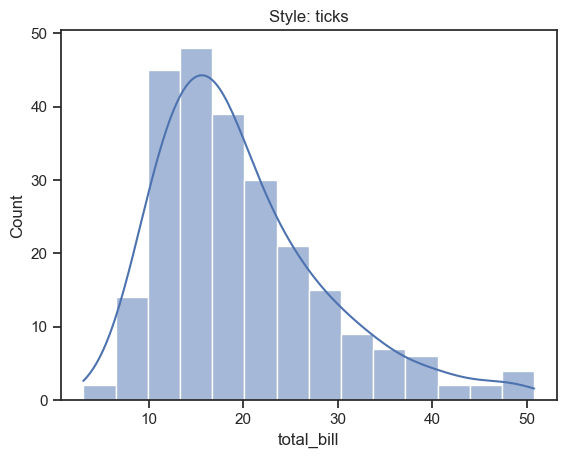

In [13]:
for style in ["darkgrid", "whitegrid", "dark", "white", "ticks"]:
    sns.set_style(style)
    plt.figure()
    sns.histplot(data=tips, x="total_bill", kde=True)
    plt.title(f"Style: {style}")
    plt.show()

# Reset to a default nice style
sns.set_style("whitegrid")

# 2.2 Comparing styles side by side

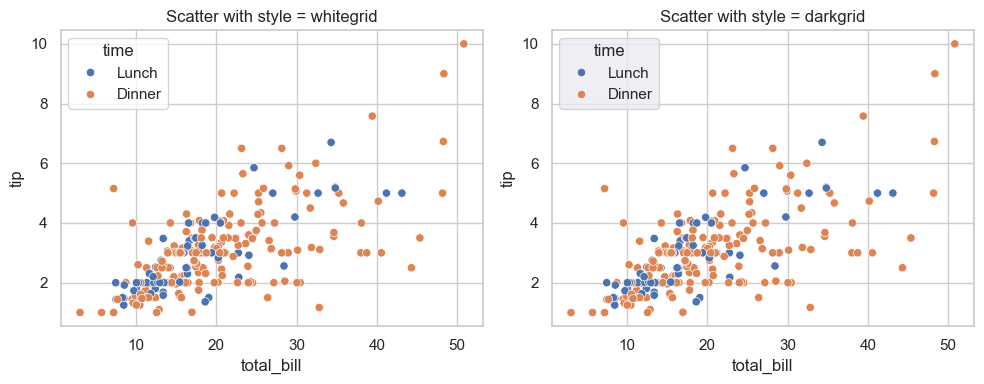

In [14]:
styles = ["whitegrid", "darkgrid"]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, style in zip(axes, styles):
    sns.set_style(style)
    sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=ax)
    ax.set_title(f"Scatter with style = {style}")

plt.tight_layout()
plt.show()

# Reset theme
sns.set_theme()

# --------------------------------------------------
# 2.3 Using Matplotlib color codes in Seaborn
# --------------------------------------------------

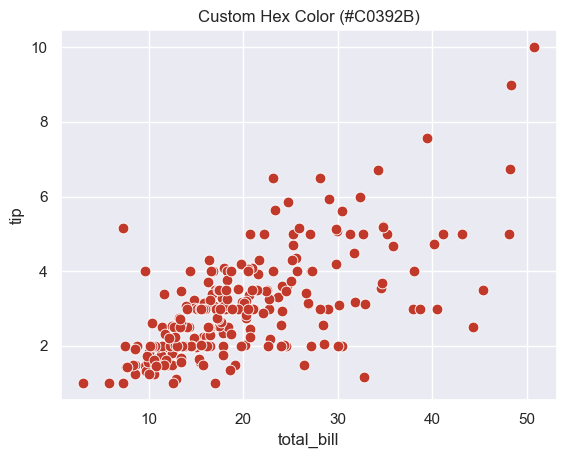

In [15]:
plt.figure()
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    color="#C0392B",   # custom hex color
    s=60
)
plt.title("Custom Hex Color (#C0392B)")
plt.show()

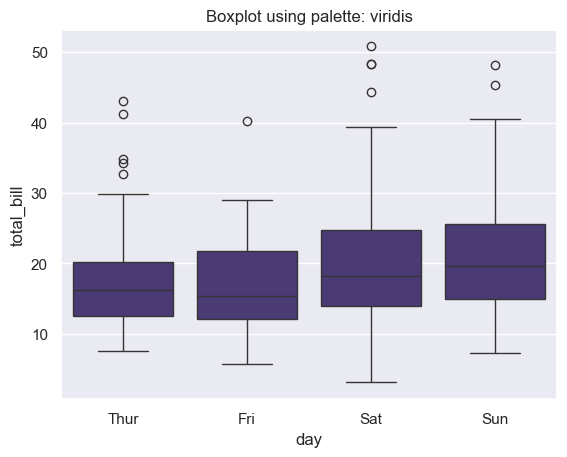

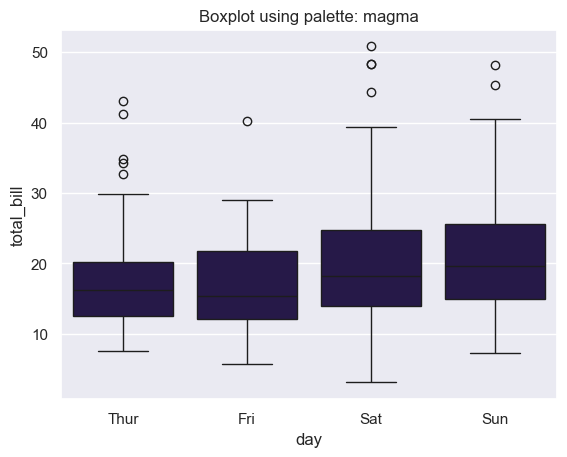

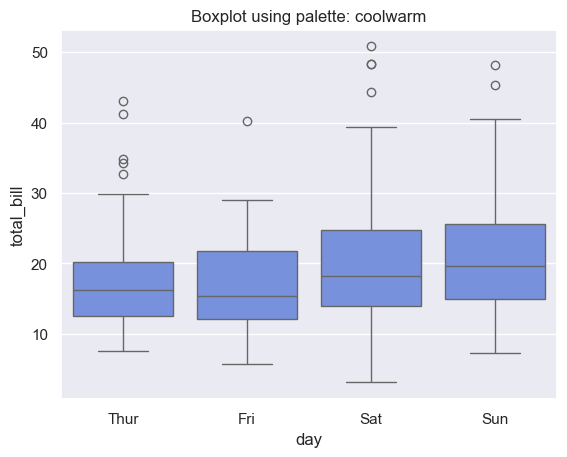

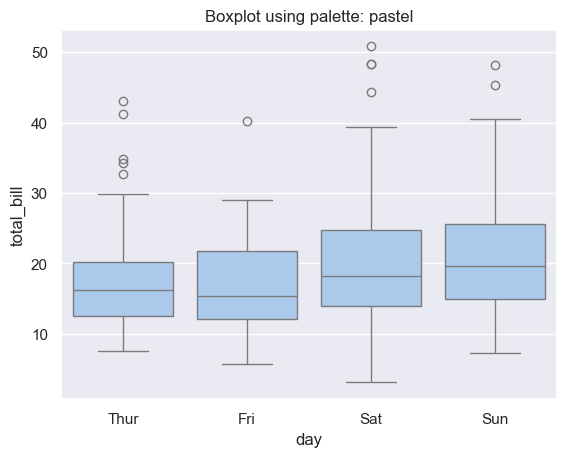

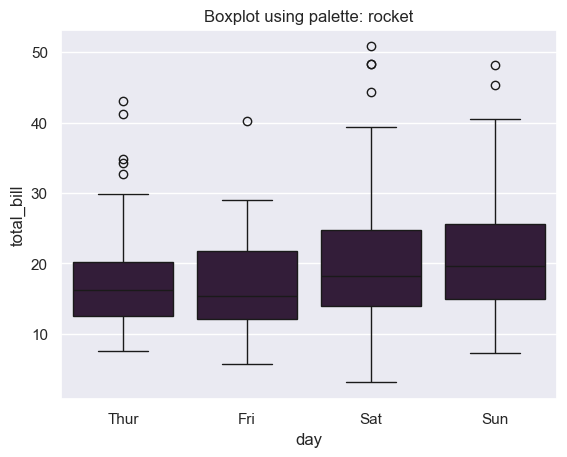

In [16]:
# --------------------------------------------------
# 2.4 Color palettes
# --------------------------------------------------
# Show some palette options
palettes = ["viridis", "magma", "coolwarm", "pastel", "rocket"]

for pal in palettes:
    sns.set_palette(pal)
    plt.figure()
    sns.boxplot(data=tips, x="day", y="total_bill")
    plt.title(f"Boxplot using palette: {pal}")
    plt.show()

# Reset theme & palette
sns.set_theme()


# 2.5 Multiple plots using FacetGrid / relplot / catplot

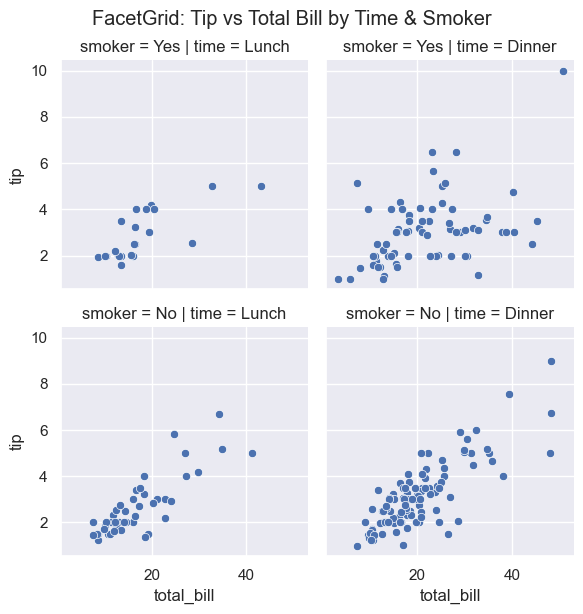

In [17]:
g = sns.FacetGrid(
    data=tips,
    col="time",
    row="smoker",
    height=3
)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.figure.suptitle("FacetGrid: Tip vs Total Bill by Time & Smoker", y=1.02)
plt.show()

# relplot example

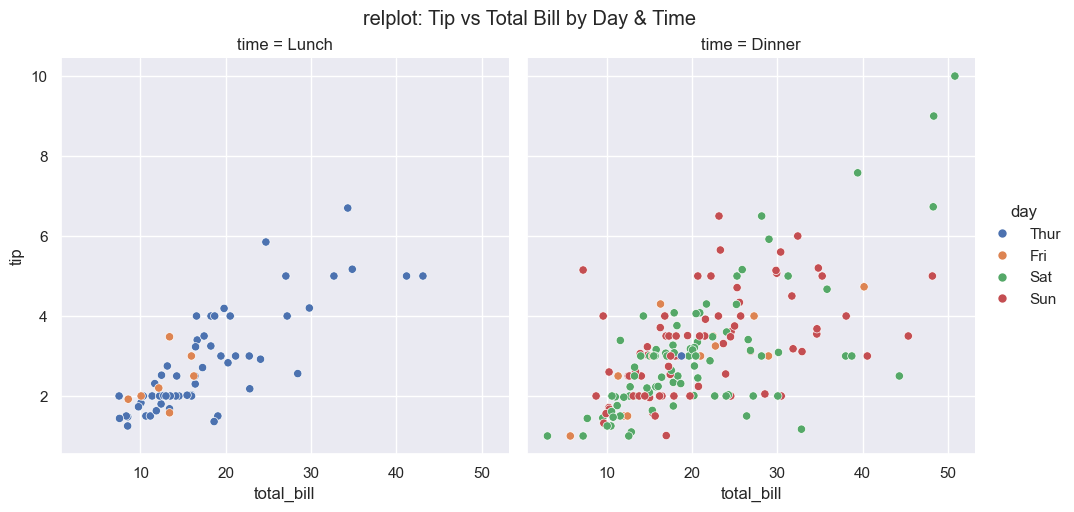

In [18]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="day",
    col="time",
    kind="scatter"
).figure.suptitle("relplot: Tip vs Total Bill by Day & Time", y=1.02)
plt.show()

c:\Users\shaha\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'gadm41_IDN_shp': 'gadm41_IDN_0' (default), 'gadm41_IDN_1', 'gadm41_IDN_2', 'gadm41_IDN_3', 'gadm41_IDN_4'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

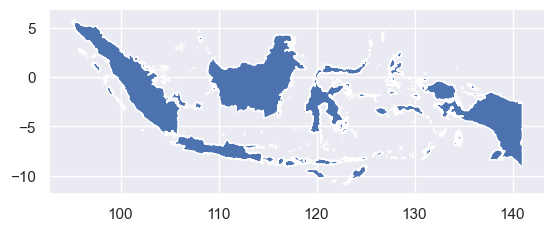

In [19]:
import geopandas as gpd
gdf = gpd.read_file(r"C:\Data from shahana_onedrive\CIMT\Data_Visualization\Assignments\Project\gadm41_IDN_shp")
gdf.plot()